<a href="https://colab.research.google.com/github/supriya5706/JumpPlus/blob/main/FifaPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#1.Load the csv file and show top 5 records from it
df = pd.read_csv("/content/players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
#overview of the statistical summary of a DataFrame's data.
print(df.describe())

           sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714

In [ ]:
# drop duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
 #2 showing each column's name 
#print(df.columns.tolist())
for col in df.columns:
  print(col)



sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [ ]:
#3 Number of rows and columns of this dataset.
df.shape

(18278, 104)

In [ ]:
#4  Number of players and their countries
num_of_players = df.groupby(['nationality']).agg(numOfPlayers=('short_name', 'count'))
num_of_players 

,numOfPlayers
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


In [ ]:
#5 top 10 countries and their number of players
top10_players = num_of_players['numOfPlayers'].nlargest(n=10)
top10_players = top10_players.to_frame().reset_index()
top10_players

,nationality,numOfPlayers
0,England,1667
1,Germany,1216
2,Spain,1035
3,France,984
4,Argentina,886
5,Brazil,824
6,Italy,732
7,Colombia,591
8,Japan,453
9,Netherlands,416


Text(0, 0.5, 'Number Of Players')

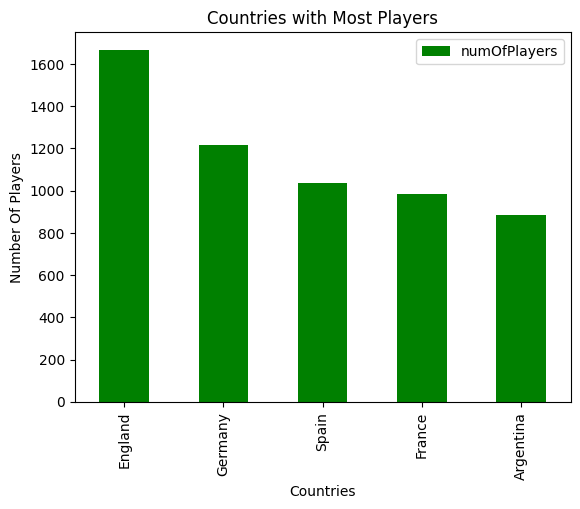

In [ ]:
#6 bar plot for top 5 countries and their number of players
top5_players = top10_players.sort_values(by="numOfPlayers", ascending=0)[:5]
top5_players.plot.bar(x='nationality', y='numOfPlayers', color="green")

plt.title("Countries with Most Players")
plt.xlabel("Countries")
plt.ylabel("Number Of Players")
     

In [ ]:
#7 top 5 players short name and wages
top5__players_wages = df.nlargest(5, 'wage_eur')
top5_players_wages = top5__players_wages[["short_name","wage_eur"]]
top5_players_wages.reset_index(drop=True)

,short_name,wage_eur
0,L. Messi,565000
1,E. Hazard,470000
2,Cristiano Ronaldo,405000
3,K. De Bruyne,370000
4,A. Griezmann,370000


In [ ]:
#8 top 5 players short name and wages with highest salaries
top5_highest_salary = df.nlargest(5,"value_eur")
highest_salary = top5_highest_salary[["short_name","wage_eur","value_eur"]]
highest_salary.reset_index(drop= True,inplace = True)
highest_salary

,short_name,wage_eur,value_eur
0,Neymar Jr,290000,105500000
1,L. Messi,565000,95500000
2,K. Mbappé,155000,93500000
3,E. Hazard,470000,90000000
4,K. De Bruyne,370000,90000000


Text(0, 0.5, 'Euro Pound')

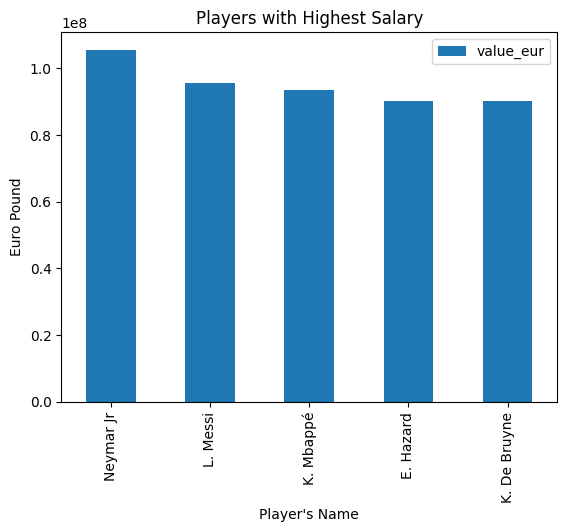

In [ ]:
#9 bar plot for highest salaries with name and wages
top5_highest_salary.plot.bar(x='short_name', y='value_eur')
plt.title("Players with Highest Salary")
plt.xlabel("Player's Name")
plt.ylabel("Euro Pound")


In [ ]:
#10	Display the short name and wages of the top 5 Germany players
def germany(col, other_cols):
    return (df.query('nationality == "Germany"') 
            .nlargest(10, col)  
            .reset_index(drop=True)[["short_name"] + other_cols] 
           )

columns = [ "wage_eur","nationality"]
result = germany("overall",columns)
result1 = result.head() 
print(result1)

      short_name  wage_eur nationality
0  M. ter Stegen    250000     Germany
1       M. Neuer    155000     Germany
2       T. Kroos    330000     Germany
3        M. Reus    170000     Germany
4     M. Hummels    130000     Germany


In [ ]:
#11 top 10 records of Germany
def germany(col, other_cols):
    return (df.query('nationality == "Germany"') 
            .nlargest(10, col)  
            .reset_index(drop=True)[["short_name"] + other_cols] 
           )

columns = [ "club","nationality"]
result = germany("overall",columns)
print(result)


      short_name                 club nationality
0  M. ter Stegen         FC Barcelona     Germany
1       M. Neuer    FC Bayern München     Germany
2       T. Kroos          Real Madrid     Germany
3        M. Reus    Borussia Dortmund     Germany
4     M. Hummels    Borussia Dortmund     Germany
5        L. Sané      Manchester City     Germany
6     J. Kimmich    FC Bayern München     Germany
7      T. Müller    FC Bayern München     Germany
8        N. Süle    FC Bayern München     Germany
9     K. Havertz  Bayer 04 Leverkusen     Germany


In [ ]:
#11 A top 5 records of Germany players who have maximum height
max_height = germany("height_cm",["short_name", "club", "height_cm", "nationality"]).head()
max_height

,short_name,short_name,club,height_cm,nationality
0,A. Seydel,A. Seydel,1. FSV Mainz 05,199,Germany
1,M. Esser,M. Esser,Hannover 96,198,Germany
2,L. Unnerstall,L. Unnerstall,PSV,198,Germany
3,R. Fährmann,R. Fährmann,Norwich City,197,Germany
4,T. Kessler,T. Kessler,1. FC Köln,197,Germany


In [ ]:
# 11B top 5 records of Germany players who have maximum weight
max_weight = germany("weight_kg",["short_name", "club", "weight_kg"]).head()
max_weight

,short_name,short_name,club,weight_kg
0,L. Unnerstall,L. Unnerstall,PSV,103
1,L. Watkowiak,L. Watkowiak,SV Wehen Wiesbaden,103
2,R. Fährmann,R. Fährmann,Norwich City,98
3,N. Süle,N. Süle,FC Bayern München,97
4,J. Tah,J. Tah,Bayer 04 Leverkusen,97


In [ ]:
#11C top 5 records of Germany players who have maximum wages 
max_wage = germany("wage_eur",["short_name", "club", "wage_eur"]).head()
max_wage


,short_name,short_name,club,wage_eur
0,T. Kroos,T. Kroos,Real Madrid,330000
1,M. ter Stegen,M. ter Stegen,FC Barcelona,250000
2,L. Sané,L. Sané,Manchester City,195000
3,I. Gündoğan,I. Gündoğan,Manchester City,180000
4,M. Reus,M. Reus,Borussia Dortmund,170000


In [ ]:
#12  top 5 players who have great shooting skills among all with short name
top5_shooter_players = df.nlargest(5, 'shooting')
top5_shooter_players = top5_shooter_players[["short_name","shooting"]].reset_index(drop=True)
top5_shooter_players
     

,short_name,shooting
0,Cristiano Ronaldo,93.0
1,L. Messi,92.0
2,H. Kane,91.0
3,S. Agüero,90.0
4,L. Suárez,89.0


In [ ]:
#13 top 5 players records (short name, defending, nationality, and club) that have awesome defending skill
defending_top5_players = df.nlargest(5,["defending"])
defending_top5_players[['short_name',"defending","nationality", "club"]]



,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


In [ ]:
#14 wages records of top 5 players of 'Real Madrid' team
#function for Real Madrid
def real_Madrid(col,*args):
  realMadrid_players = df[df.club == "Real Madrid"]
  realMadrid_top5_players = realMadrid_players.nlargest(5,[f"{col}"])
  realMadrid_top5_players.reset_index(drop=True, inplace=True)
  return realMadrid_top5_players[['short_name',*args]]
real_Madrid("wage_eur","wage_eur", "club")

,short_name,wage_eur,club
0,E. Hazard,470000,Real Madrid
1,L. Modrić,340000,Real Madrid
2,T. Kroos,330000,Real Madrid
3,Sergio Ramos,300000,Real Madrid
4,K. Benzema,285000,Real Madrid


In [ ]:
#15 shooting records of top 5 players of 'Real Madrid' team
real_Madrid("shooting")

,short_name
0,G. Bale
1,J. Rodríguez
2,E. Hazard
3,K. Benzema
4,L. Jović


In [ ]:
#16 defending records of top 5 players of 'Real Madrid' team
real_Madrid("defending")

,short_name
0,Sergio Ramos
1,Casemiro
2,R. Varane
3,Carvajal
4,Nacho Fernández


In [ ]:
#17 nationality records of top 5 players of 'Real Madrid' team
real_Madrid("overall","overall", "nationality")


,short_name,overall,nationality
0,E. Hazard,91,Belgium
1,L. Modrić,90,Croatia
2,Sergio Ramos,89,Spain
3,T. Courtois,88,Belgium
4,T. Kroos,88,Germany


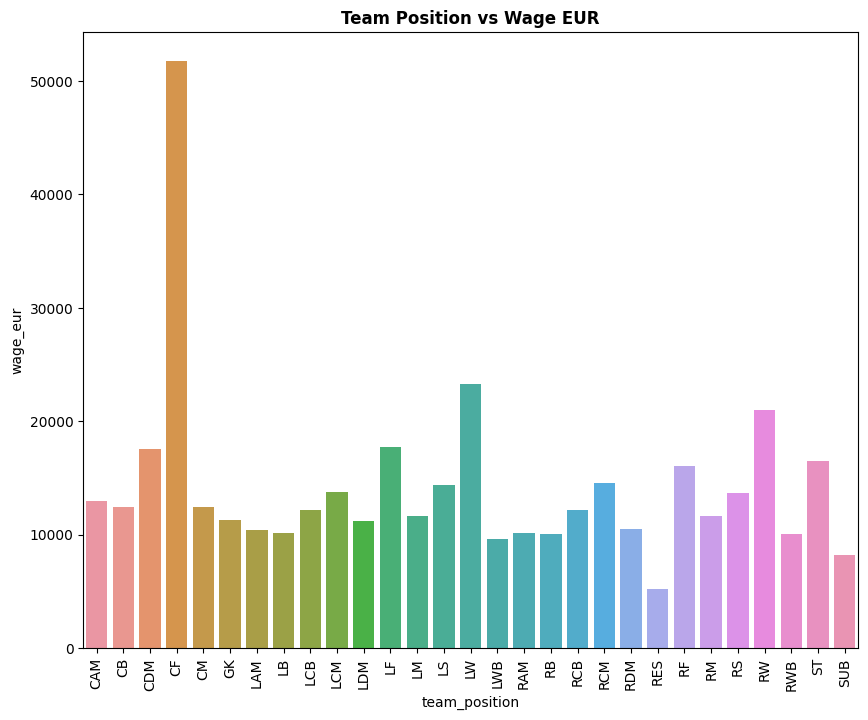

In [ ]:
plt.figure(figsize= (10,8))
temp_df = df.groupby("team_position")["wage_eur"].mean().reset_index()
sns.barplot(
    data = temp_df,
    x = "team_position",
    y = "wage_eur"    
)
plt.xticks(rotation= 90);
plt.title("Team Position vs Wage EUR", fontsize = 12, weight = "bold");